# WeatherPy

# Observations
The temperature correlates with the latitude. As latitude moves away from equator, temperature also decreases.
It seems that there is no correlation between humidity and latitude
There is very little correlation between windspeed and latitude, windspeed tends to be higher near lower temperatures.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

    
# Print to logger
print(f'Beginning Data Retrieval')
print('--------------------------')
      
# Create counters
record_count = 0
set_count = 1

      
# Loop through all the cities in our list
      
for city in cities:
      
# Group cities in sets of 50 for logging purposes
    if record_count <= 49:
        record_count += 1
    else: 
        set_count += 1
        record_count = 1
        
   
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count} of Set {set_count}| {city}')
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        data = requests.get(city_url).json()
        
        # Parse out the city name, lat, lng, max temp, humidity, and cloudiness wind speed country date
        city_lat = data['coord']['lat']
        city_lon = data['coord']['lon']
        city_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_cloudiness = data['clouds']['all']
        city_windspeed = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']
        
        # Append the City information into city_data list
        city_data.append({'city' :city,
                     'lat': city_lat,
                     'lon': city_lon, 
                     'Max Temp': city_temp,
                     'Humidity' : city_humidity,
                     'Cloudiness': city_cloudiness,
                     'Windspeed' : city_windspeed,
                     'Country' : city_country,
                     'Date' : city_date})
        
    # If an error is experienced, skip the city
    except:
        print(f'City not found. Skipping...') 
        pass
# Indicate that Data Loading is complete 
print(f'------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1| bredasdorp
Processing Record 2 of Set 1| kinshasa
Processing Record 3 of Set 1| mitu
Processing Record 4 of Set 1| rikitea
Processing Record 5 of Set 1| lannion
Processing Record 6 of Set 1| moramanga
Processing Record 7 of Set 1| naliya
Processing Record 8 of Set 1| alta floresta
Processing Record 9 of Set 1| hobart
Processing Record 10 of Set 1| albany
Processing Record 11 of Set 1| bara
Processing Record 12 of Set 1| gigmoto
Processing Record 13 of Set 1| kapaa
Processing Record 14 of Set 1| ushuaia
Processing Record 15 of Set 1| allada
Processing Record 16 of Set 1| roma
Processing Record 17 of Set 1| illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1| isangel
Processing Record 19 of Set 1| mataura
Processing Record 20 of Set 1| sitka
Processing Record 21 of Set 1| ribeira grande
Processing Record 22 of Set 1| port augusta
Processing Record 23 of Set 1| kamaishi
Processing Reco

Processing Record 44 of Set 4| praia
Processing Record 45 of Set 4| saint george
Processing Record 46 of Set 4| kastamonu
Processing Record 47 of Set 4| chagda
City not found. Skipping...
Processing Record 48 of Set 4| narsaq
Processing Record 49 of Set 4| brae
Processing Record 50 of Set 4| la ronge
Processing Record 1 of Set 5| palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 5| grand-lahou
Processing Record 3 of Set 5| kortkeros
Processing Record 4 of Set 5| butajira
Processing Record 5 of Set 5| vaitupu
City not found. Skipping...
Processing Record 6 of Set 5| fare
Processing Record 7 of Set 5| la palma
Processing Record 8 of Set 5| tabarqah
City not found. Skipping...
Processing Record 9 of Set 5| mahebourg
Processing Record 10 of Set 5| vung tau
Processing Record 11 of Set 5| acari
Processing Record 12 of Set 5| mareeba
Processing Record 13 of Set 5| sola
Processing Record 14 of Set 5| qasigiannguit
Processing Record 15 of Set 5| abu dhabi
Processing Record 16

Processing Record 35 of Set 8| skagen
Processing Record 36 of Set 8| port hardy
Processing Record 37 of Set 8| palana
Processing Record 38 of Set 8| salinas
Processing Record 39 of Set 8| nantucket
Processing Record 40 of Set 8| lieksa
Processing Record 41 of Set 8| tecoanapa
Processing Record 42 of Set 8| coquimbo
Processing Record 43 of Set 8| mahajanga
Processing Record 44 of Set 8| simpsonville
Processing Record 45 of Set 8| sao filipe
Processing Record 46 of Set 8| ahipara
Processing Record 47 of Set 8| khandyga
Processing Record 48 of Set 8| tessalit
Processing Record 49 of Set 8| chumikan
Processing Record 50 of Set 8| cumaral
Processing Record 1 of Set 9| augusta
Processing Record 2 of Set 9| chilca
Processing Record 3 of Set 9| roblin
Processing Record 4 of Set 9| xichang
Processing Record 5 of Set 9| huarmey
Processing Record 6 of Set 9| alleroy
Processing Record 7 of Set 9| mayo
Processing Record 8 of Set 9| burkhala
City not found. Skipping...
Processing Record 9 of Set 9| 

Processing Record 30 of Set 12| baglung
Processing Record 31 of Set 12| goderich
Processing Record 32 of Set 12| phalaborwa
Processing Record 33 of Set 12| palmerston north
Processing Record 34 of Set 12| san vicente
Processing Record 35 of Set 12| dire dawa
Processing Record 36 of Set 12| vrangel
Processing Record 37 of Set 12| the valley
Processing Record 38 of Set 12| smithers
Processing Record 39 of Set 12| lucapa
Processing Record 40 of Set 12| mongomo
Processing Record 41 of Set 12| husavik
Processing Record 42 of Set 12| yinchuan
Processing Record 43 of Set 12| pacific grove
Processing Record 44 of Set 12| fomboni
Processing Record 45 of Set 12| akdepe
Processing Record 46 of Set 12| kalmar
Processing Record 47 of Set 12| diapaga
Processing Record 48 of Set 12| awjilah
Processing Record 49 of Set 12| prince rupert
Processing Record 50 of Set 12| kloulklubed
Processing Record 1 of Set 13| ladario
Processing Record 2 of Set 13| meaford
Processing Record 3 of Set 13| guanica
Proces

### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

city          563
lat           563
lon           563
Max Temp      563
Humidity      563
Cloudiness    563
Windspeed     563
Country       563
Date          563
dtype: int64

In [9]:
# Display the City Data Frame
city_data_df

,city,lat,lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,bredasdorp,-34.53,20.04,50.00,81,0,2.24,ZA,1603225932
1,kinshasa,-4.32,15.32,82.40,74,20,2.24,CD,1603225933
2,mitu,1.20,-70.17,81.05,90,99,2.01,CO,1603225933
3,rikitea,-23.12,-134.97,73.51,79,0,14.97,PF,1603225933
4,lannion,48.75,-3.42,59.00,87,100,9.17,FR,1603225933
...,...,...,...,...,...,...,...,...,...
558,solvychegodsk,61.33,46.92,28.99,97,100,7.81,RU,1603226014
559,nieuwpoort,51.12,2.77,57.99,93,100,10.29,BE,1603226014
560,morehead,37.27,-87.18,71.01,100,90,5.21,US,1603226015
561,lasa,46.62,10.70,51.01,93,75,5.82,IT,1603226015


### Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [10]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.describe()

,lat,lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,18.599059,14.566146,61.520480,72.682060,53.952043,7.827158,1.603226e+09
std,33.315296,92.394491,20.123213,20.827631,39.974763,5.464622,6.030656e+01
min,-54.800000,-179.170000,5.000000,8.000000,0.000000,0.450000,1.603226e+09
25%,-9.420000,-66.890000,46.895000,64.000000,10.000000,3.620000,1.603226e+09
50%,20.700000,18.340000,66.200000,77.000000,67.000000,6.930000,1.603226e+09
75%,46.540000,94.385000,78.765000,88.000000,94.000000,10.335000,1.603226e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,36.910000,1.603226e+09


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [4]:
# Export the City_Data into a csv
#city_data_df.to_csv('..\Python-API\output_data\data_city.csv')
city_data_df = pd.read_csv('..\Python-API\output_data\data_city.csv')

In [5]:
# Extract relevant fields from the data frame
lats = city_data_df['lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
windspeed = city_data_df['Windspeed']

data_city = pd.DataFrame({'Latitude': lats,
                     'Max_Temp' : max_temp, 
                     'Humidity' : humidity,
                     'Cloudiness': cloudiness,
                     'Windspeed' : windspeed}) 
data_city

,Latitude,Max_Temp,Humidity,Cloudiness,Windspeed
0,-34.53,50.00,81,0,2.24
1,-4.32,82.40,74,20,2.24
2,1.20,81.05,90,99,2.01
3,-23.12,73.51,79,0,14.97
4,48.75,59.00,87,100,9.17
...,...,...,...,...,...
558,61.33,28.99,97,100,7.81
559,51.12,57.99,93,100,10.29
560,37.27,71.01,100,90,5.21
561,46.62,51.01,93,75,5.82


In [6]:
latitude = data_city['Latitude']
temperature = data_city['Max_Temp']
humidity = data_city["Humidity"]
cloudiness = data_city["Cloudiness"]
windspeed = data_city["Windspeed"]

### Latitude vs. Temperature Plot

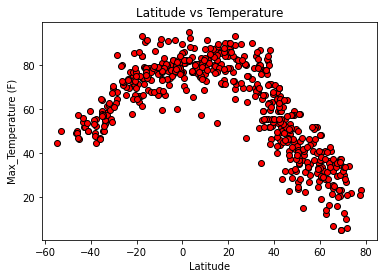

In [7]:
# Build scatter plot for latitude vs. temperature

plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max_Temperature (F)")

# Save the figure
plt.savefig('../Python-API/output_data/temp.png')
plt.show()

# Show plot


### Latitude vs. Humidity Plot

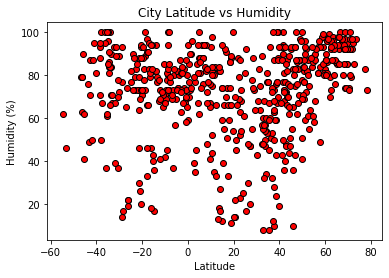

In [8]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig('..\Python-API\output_data\humidity.png')
plt.show()
# Show plot


### Latitude vs. Cloudiness Plot

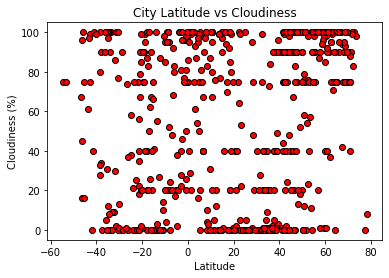

In [9]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")
# Incorporate the other graph properties

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig('..\Python-API\output_data\cloudiness.png')
plt.show()

# Show plot


### Latitude vs. Wind Speed Plot

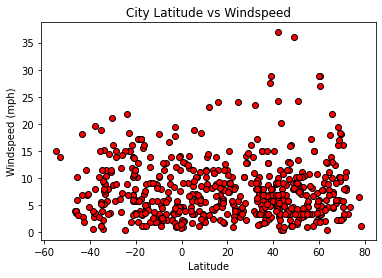

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude, windspeed, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

# Save the figure
# Show plot
plt.savefig('..\Python-API\output_data\windspeed.png')
plt.show()



In [11]:
#Split dataframe into Northern hemispheres

northern = data_city.loc[data_city['Latitude'] >= 0]
northern


,Latitude,Max_Temp,Humidity,Cloudiness,Windspeed
2,1.20,81.05,90,99,2.01
4,48.75,59.00,87,100,9.17
6,23.27,82.90,73,0,8.39
9,42.60,66.00,77,100,1.12
10,10.37,80.15,44,80,5.66
...,...,...,...,...,...
557,50.59,24.40,84,58,1.99
558,61.33,28.99,97,100,7.81
559,51.12,57.99,93,100,10.29
560,37.27,71.01,100,90,5.21


In [12]:
southern = data_city.loc[data_city['Latitude'] < 0]
southern

,Latitude,Max_Temp,Humidity,Cloudiness,Windspeed
0,-34.53,50.00,81,0,2.24
1,-4.32,82.40,74,20,2.24
3,-23.12,73.51,79,0,14.97
5,-18.93,63.05,89,99,1.83
7,-9.88,89.53,42,95,2.86
...,...,...,...,...,...
539,-8.42,68.29,85,52,4.56
544,-12.28,79.68,69,0,2.62
551,-19.00,86.00,78,75,12.75
556,-30.74,67.14,70,100,11.43


### Linear Regression

In [13]:
# Create a function to create Linear Regression plots
def lineregres(x_values, y_values, x_label, y_label):
    
     
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
    

In [14]:
# Create Northern and Southern Hemisphere DataFrames
s_lat = southern['Latitude']
s_temp = southern['Max_Temp']
s_hum = southern["Humidity"]
s_cloud = southern["Cloudiness"]
s_windspeed = southern["Windspeed"]

### Max Temp vs. Latitude Linear Regression

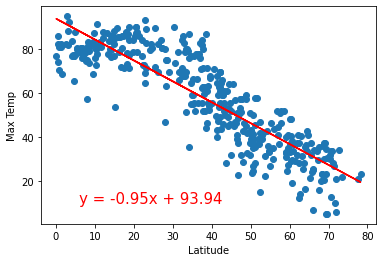

In [15]:
# Linear regression on Northern Hemisphere
n_lat = northern['Latitude']
n_temp = northern['Max_Temp']
n_hum = northern["Humidity"]
n_cloud = northern["Cloudiness"]
n_windspeed = northern["Windspeed"]

x_values = n_lat
y_values = n_temp
x_label = 'Latitude'
y_label = "Max Temp"
lineregres(x_values, y_values, x_label, y_label)

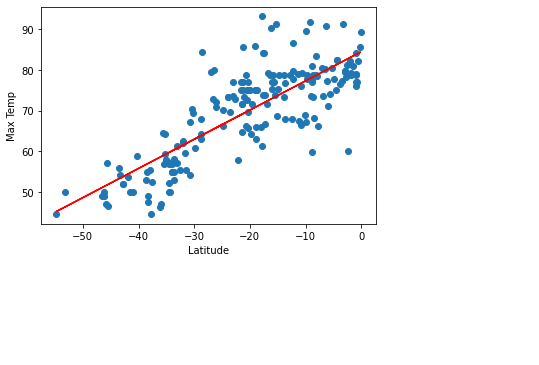

In [16]:
# Linear regression on Southern Hemisphere
x_values = s_lat
y_values = s_temp
x_label = 'Latitude'
y_label = "Max Temp"
lineregres(x_values, y_values, x_label, y_label)

### Humidity (%) vs. Latitude Linear Regression

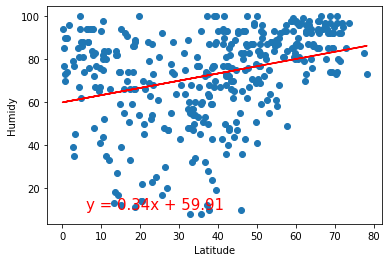

In [17]:
# Northern Hemisphere
x_values = n_lat
y_values = n_hum
x_label = 'Latitude'
y_label = "Humidy"
lineregres(x_values, y_values, x_label, y_label)

In [18]:
# Southern Hemisphere


### Cloudiness (%) vs. Latitude Linear Regression

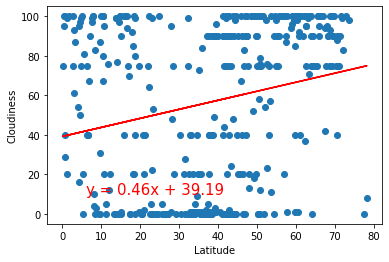

In [19]:
# Northern Hemisphere
x_values = n_lat
y_values = n_cloud
x_label = 'Latitude'
y_label = "Cloudiness"
lineregres(x_values, y_values, x_label, y_label)

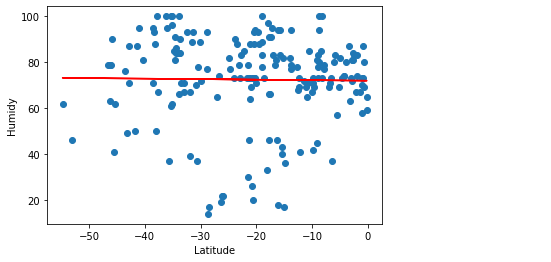

In [20]:
# Southern Hemisphere
x_values = s_lat
y_values = s_hum
x_label = 'Latitude'
y_label = "Humidy"
lineregres(x_values, y_values, x_label, y_label)

### Wind Speed (mph) vs. Latitude Linear Regression

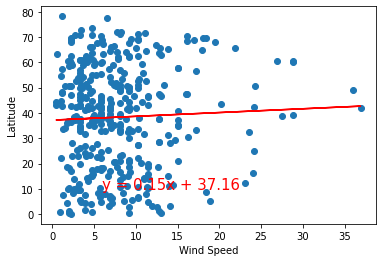

In [22]:
# Northern Hemisphere
x_values = n_windspeed
y_values = n_lat
x_label = 'Wind Speed'
y_label = "Latitude"
lineregres(x_values, y_values, x_label, y_label)

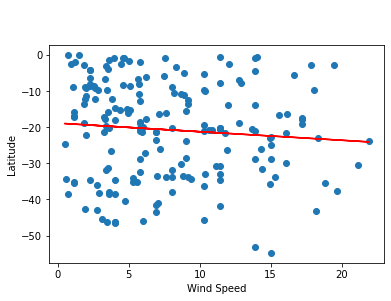

In [23]:
# Southern Hemisphere
x_values = s_windspeed
y_values = s_lat
x_label = 'Wind Speed'
y_label = "Latitude"
lineregres(x_values, y_values, x_label, y_label)